## High and Low Pass Filters

Now, you might be wondering, what makes filters high and low-pass; why is a Sobel filter high-pass and a Gaussian filter low-pass?

Well, you can actually visualize the frequencies that these filters block out by taking a look at their fourier transforms. The frequency components of any image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum. So, let's treat our filters as small images, and display them in the frequency domain!

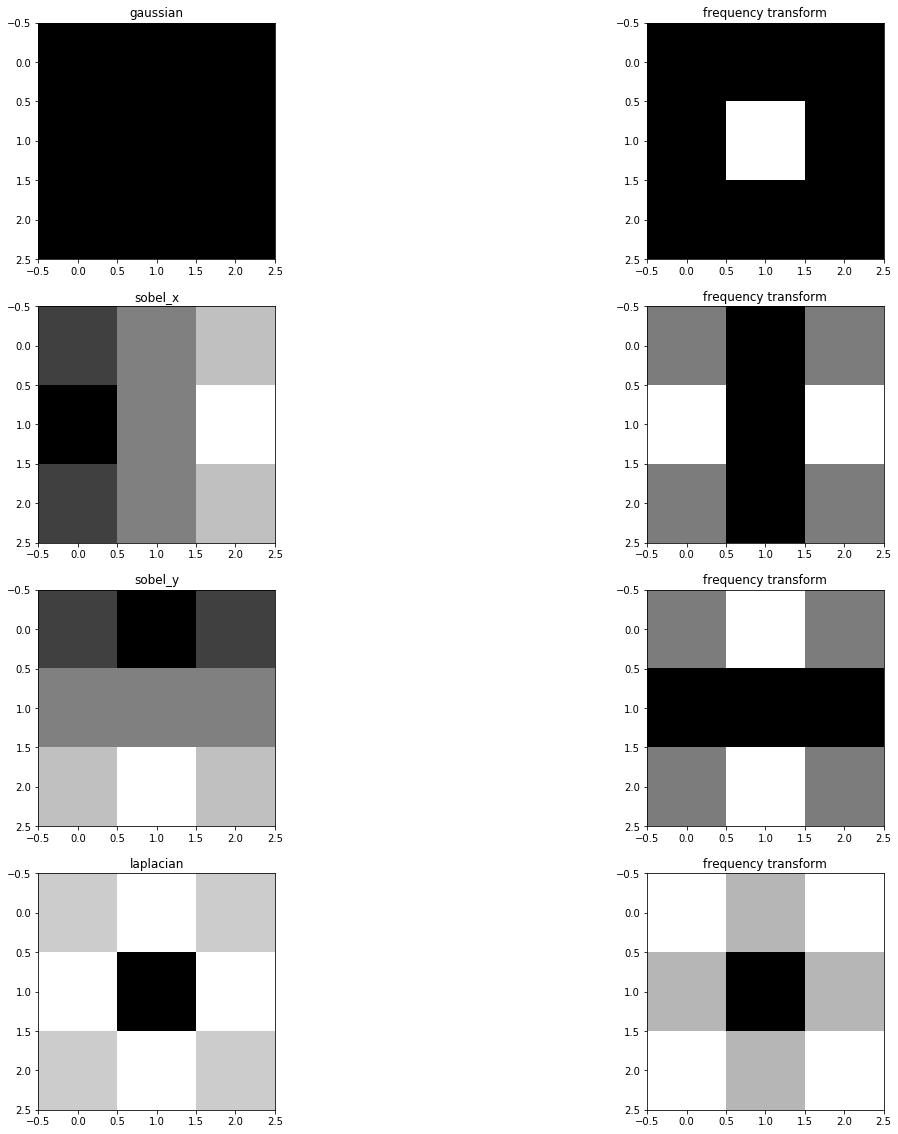

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
#for i in range(len(filters)):
#    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
#    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

f, ((ax11,ax12),(ax21,ax22), (ax31, ax32), (ax41, ax42)) = plt.subplots(4, 2, figsize=(20,20))

ax11.set_title(filter_name[0])
ax11.imshow(filters[0], cmap='gray')
ax12.set_title("frequency transform")
ax12.imshow(frequency_tx[0], cmap='gray')

ax21.set_title(filter_name[1])
ax21.imshow(filters[1], cmap='gray')
ax22.set_title("frequency transform")
ax22.imshow(frequency_tx[1], cmap='gray')

ax31.set_title(filter_name[2])
ax31.imshow(filters[2], cmap='gray')
ax32.set_title("frequency transform")
ax32.imshow(frequency_tx[2], cmap='gray')

ax41.set_title(filter_name[3])
ax41.imshow(filters[3], cmap='gray')
ax42.set_title("frequency transform")
ax42.imshow(frequency_tx[3], cmap='gray')

plt.show()

Areas of white or light gray, allow that part of the frequency spectrum through! Areas of black mean that part of the spectrum is blocked out of the image. 

Recall that the low frequencies in the frequency spectrum are at the center of the frequency transform image, and high frequencies are at the edges. You should see that the Gaussian filter allows only low-pass frequencies through, which is the center of the frequency transformed image. The sobel filters block out frequencies of a certain orientation and a laplace (detects edges regardless of orientation) filter, should block out low-frequencies!

You are encouraged to load in an image, apply a filter to it using `filter2d` then visualize what the fourier transform of that image looks like before and after a filter is applied.

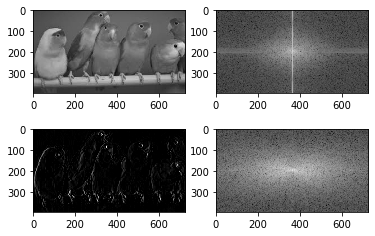

In [14]:
## TODO: load in an image, and filter it using a kernel of your choice
## apply a fourier transform to the original *and* filtered images and compare them

import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/birds.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)

f_filtered = np.fft.fft2(filtered)
f_filtered_shift = np.fft.fftshift(f_filtered)
frequency_filtered = np.log(np.abs(f_filtered_shift)+1)

f_unfiltered = np.fft.fft2(gray)
f_unfiltered_shift = np.fft.fftshift(f_unfiltered)
frequency_unfiltered = np.log(np.abs(f_unfiltered_shift)+1)

plt.subplot(2,2,1),plt.imshow(gray,cmap = 'gray')
plt.subplot(2,2,2),plt.imshow(frequency_unfiltered,cmap = 'gray')
plt.subplot(2,2,3),plt.imshow(filtered,cmap = 'gray')
plt.subplot(2,2,4),plt.imshow(frequency_filtered,cmap = 'gray')

plt.show()